<center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">به نام خدا</div></center>
<h1><center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">مقدمه ای بر شبکه‌های عصبی کانولوشنالی<br>Convolutionl Neural Networks - CNN</div></center></h1>

# New Section

<div style="direction:rtl;text-align:right;font-family:Tahoma">
اگر روی گوگل کولب اجرا میکنید این خطوط را از حالت کامنت خارج نمائید.
</div>

In [2]:
!wget https://raw.githubusercontent.com/Alireza-Akhavan/SRU-deeplearning-workshop/master/dataset.py
#!mkdir dataset
!wget https://github.com/Alireza-Akhavan/SRU-deeplearning-workshop/raw/master/dataset/Data_hoda_full.mat -P dataset

--2023-12-31 15:38:29--  https://raw.githubusercontent.com/Alireza-Akhavan/SRU-deeplearning-workshop/master/dataset.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 917 [text/plain]
Saving to: ‘dataset.py’

dataset.py          100%[===================>]     917  --.-KB/s    in 0s      

2023-12-31 15:38:29 (50.5 MB/s) - ‘dataset.py’ saved [917/917]

--2023-12-31 15:38:29--  https://github.com/Alireza-Akhavan/SRU-deeplearning-workshop/raw/master/dataset/Data_hoda_full.mat
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/Alireza-Akhavan/deeplearning-tensorflow2-notebooks/raw/master/dataset/Data_

In [3]:
### Import libraries and modules
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np
from dataset import load_hoda
import matplotlib.pyplot as plt

# Load pre-shuffled HODA data into train and test sets
X_train, y_train, X_test, y_test = load_hoda(
                                            training_sample_size=3500,
                                            test_sample_size=400,size=28)

In [4]:
# Preprocess input data
'''normalize our data values to the range [0, 1]'''
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Reshape to original image shape (n x 784)  ==> (n x 28 x 28 x 1)
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
### یک جایگاه تعداد کاناله باید همیشه نوشته باشه حتی اگر تک کانال باشه قانون کانولوشن هست


# 4. Preprocess class labels
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [5]:
# 5. Define model architecture
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

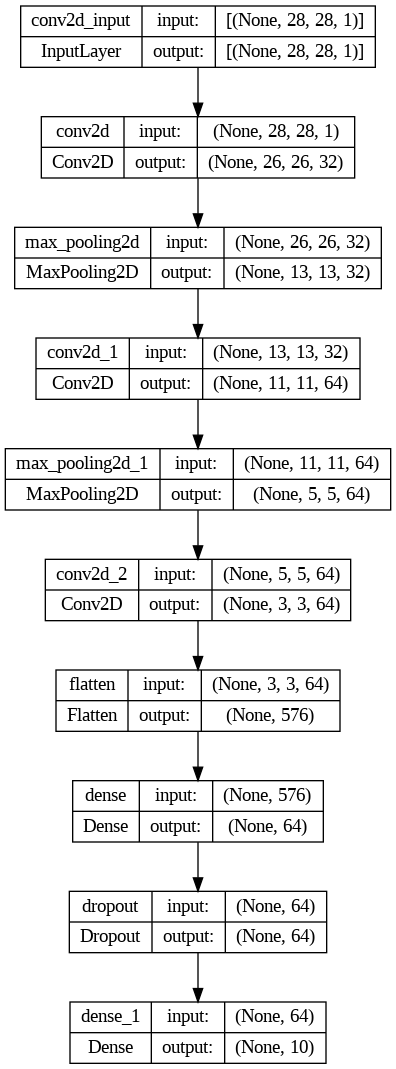

In [7]:
keras.utils.plot_model(model, show_shapes=True)

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">کد یک شبکه کانولوشنالی و آموزش آن از ابتدا تا انتها بر روی مجموعه داده هدی</div>


In [8]:
# 6. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


# 7. Fit model on training data
history = model.fit(X_train, y_train,
                    epochs=200, batch_size=256, validation_split=0.2)


Epoch 1/200
11/11 [==============================] - 7s 75ms/step - loss: 2.1609 - accuracy: 0.2386 - val_loss: 1.8181 - val_accuracy: 0.5371
Epoch 2/200
11/11 [==============================] - 0s 10ms/step - loss: 1.5961 - accuracy: 0.4514 - val_loss: 1.0214 - val_accuracy: 0.7400
Epoch 3/200
11/11 [==============================] - 0s 10ms/step - loss: 1.1382 - accuracy: 0.5989 - val_loss: 0.6657 - val_accuracy: 0.7943
Epoch 4/200
11/11 [==============================] - 0s 13ms/step - loss: 0.8620 - accuracy: 0.7086 - val_loss: 0.5128 - val_accuracy: 0.8371
Epoch 5/200
11/11 [==============================] - 0s 12ms/step - loss: 0.7029 - accuracy: 0.7625 - val_loss: 0.3708 - val_accuracy: 0.8800
Epoch 6/200
11/11 [==============================] - 0s 13ms/step - loss: 0.5378 - accuracy: 0.8125 - val_loss: 0.3054 - val_accuracy: 0.8929
Epoch 7/200
11/11 [==============================] - 0s 13ms/step - loss: 0.4683 - accuracy: 0.8407 - val_loss: 0.2606 - val_accuracy: 0.9129
Epoch 

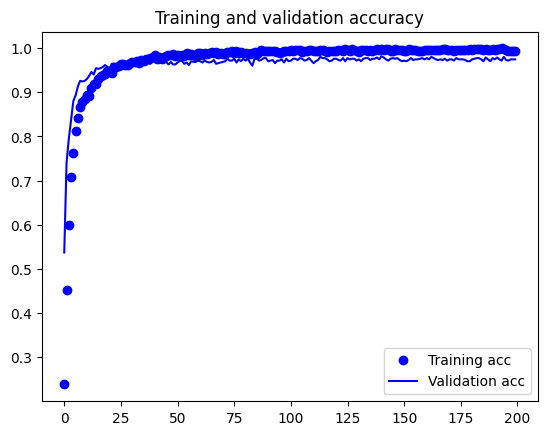

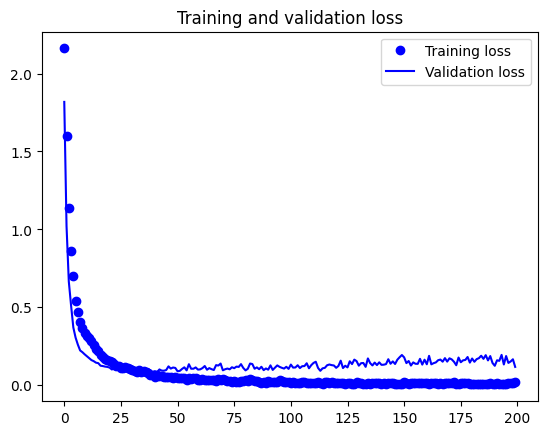

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [10]:
import cv2

In [17]:
img=cv2.imread('test.png',0)

In [18]:
img=cv2.resize(img,(28,28))

In [19]:
img=img.reshape(1,28,28,1)

In [21]:
img=img.astype('float32')/255

In [22]:
p=model.predict(img)

1/1 [==============================] - 0s 266ms/step


In [25]:
np.argmax(p)

8

In [26]:
p

array([[4.58497749e-15, 8.45571568e-21, 1.80792278e-22, 1.69733959e-19,
        1.37020376e-17, 6.90739611e-18, 3.07974611e-23, 3.92758672e-18,
        1.00000000e+00, 4.34308079e-19]], dtype=float32)

In [30]:
model.save('CNN1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
